# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [88]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.* 

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [90]:
yelp_business = pd.read_csv("./yelp_data/yelp_business.csv", sep=',', index_col=0)
yelp_business.head(5)

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  is_open  \
0  33.330690 -111.978599        1   
1  40.291685  -80.104900        1   
2  33.524903 -112.115310        1   
3  33.383147 -111.964725        0   
4  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [91]:
city_occurrence = (
    yelp_business
        .groupby("city")["business_id"]
        .count()
        .reset_index(name="count")
        .sort_values(by="count", ascending=False)
)
city_occurrence.head(5)

city  count
424   Las Vegas  26775
713     Phoenix  17213
983     Toronto  17206
143   Charlotte   8553
871  Scottsdale   8228

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

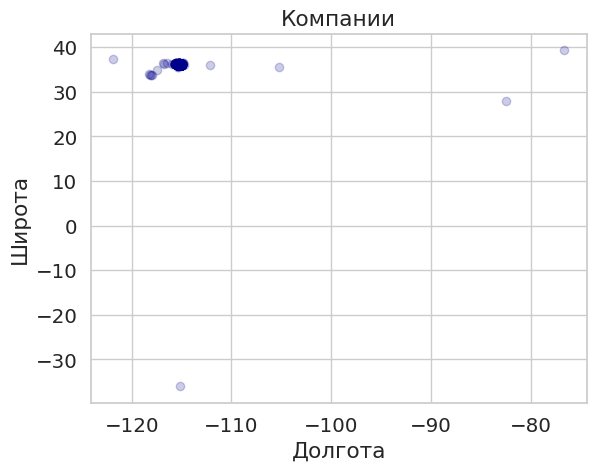

In [92]:
yelp_business = yelp_business[yelp_business.city == city_occurrence.city.iloc[0]]

plt.figure()
plt.title("Компании")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.scatter(x=yelp_business.longitude, y=yelp_business.latitude,
            alpha=0.2, color="darkblue")

plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

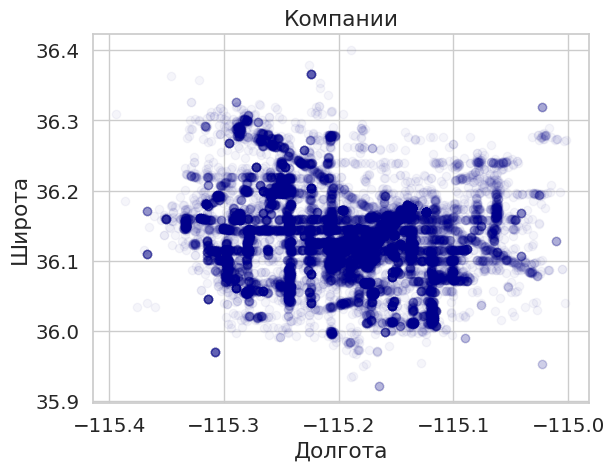

In [93]:
yelp_business = yelp_business[
    (35.9 <= yelp_business.latitude) &
    (yelp_business.latitude <= 36.4) &
    (-115.4 <= yelp_business.longitude) &
    (yelp_business.longitude <= -115.0)
]

plt.figure()
plt.title("Компании")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.scatter(x=yelp_business.longitude, y=yelp_business.latitude,
            alpha=0.04, color="darkblue")

plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [94]:
fig = px.scatter_mapbox(yelp_business,
                        lat="latitude",
                        lon="longitude",
                        color_discrete_sequence=px.colors.sequential.Plasma,
                        zoom=10,
                        height=600,
                        center=go.layout.mapbox.Center(lon=-115.15, lat=36.1),
                        opacity=0.3)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

In [ ]:
plotly.offline.plot(fig, filename='companies_location.html', auto_open=False)

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [96]:
yelp_review = pd.read_csv("./yelp_data/yelp_review.csv", sep=',', index_col=0)
yelp_review.head(5)

business_id  stars
0  AEx2SYEUJmTxVVB18LlCwA      5
1  VR6GpWIda3SfvPC-lg9H3w      5
2  CKC0-MOWMqoeWf6s-szl8g      5
3  ACFtxLv8pGrrxMm6EgjreA      4
4  s2I_Ni76bjJNK9yG60iD-Q      4

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [97]:
yelp_review = (
    yelp_review 
        .set_index("business_id") 
        .loc[yelp_business.business_id] 
        .reset_index()
)

yelp_review.head(5)

business_id  stars
0  kCoE3jvEtg6UVz5SOD3GVw      4
1  kCoE3jvEtg6UVz5SOD3GVw      1
2  kCoE3jvEtg6UVz5SOD3GVw      5
3  kCoE3jvEtg6UVz5SOD3GVw      5
4  kCoE3jvEtg6UVz5SOD3GVw      5

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [98]:
yelp_review = yelp_review.groupby(by="business_id").aggregate(["mean", "size"])
yelp_review.head(5)

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [99]:
yelp_review.columns = ["rating", "reviews"]
yelp_review.head(5)

rating  reviews
business_id                              
--9e1ONYQuAa-CB_Rrw7Tw  4.088904     1451
--DdmeR16TRb3LsjG0ejrQ  3.200000        5
--WsruI0IGEoeRmkErU5Gg  4.928571       14
--Y7NhBKzLTbNliMUX_wfg  4.875000        8
--e8PjCNhEz32pprnPhCwQ  3.473684       19

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [100]:
yelp_joined = yelp_business.set_index("business_id")[
    ["latitude", "longitude", "categories", "name"]
].join(yelp_review)

yelp_joined.head(5)

latitude   longitude  \
business_id                                     
kCoE3jvEtg6UVz5SOD3GVw  36.207430 -115.268460   
OD2hnuuTJI9uotcKycxg1A  36.197484 -115.249660   
VBHEsoXQb2AQ76J9l8h1uQ  36.085051 -115.119421   
1Jp_hmPNUZArNqzpbm7B0g  36.056382 -115.269332   
DPQnTnNw2PJj7DdENM98Cw  36.105196 -115.056880   

                                                               categories  \
business_id                                                                 
kCoE3jvEtg6UVz5SOD3GVw  Real Estate Services;Real Estate;Home Services...   
OD2hnuuTJI9uotcKycxg1A                            Shopping;Sporting Goods   
VBHEsoXQb2AQ76J9l8h1uQ       Shopping;Jewelry;Watch Repair;Local Services   
1Jp_hmPNUZArNqzpbm7B0g  Home Services;Lighting Fixtures & Equipment;Lo...   
DPQnTnNw2PJj7DdENM98Cw       Nurseries & Gardening;Home & Garden;Shopping   

                                       name    rating  reviews  
business_id                                                     
kCoE3jvEtg6UVz5SOD3GVw         "BDJ Realty"  4.000000        5  
OD2hnuuTJI9uotcKycxg1A        "Soccer Zone"  1.444444        9  
VBHEsoXQb2AQ76J9l8h1uQ  "Alfredo's Jewelry"  4.739130       23  
1Jp_hmPNUZArNqzpbm7B0g      "Task Electric"  4.450000       20  
DPQnTnNw2PJj7DdENM98Cw       "Star Nursery"  3.680000       25

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [101]:
fig = px.scatter_mapbox(yelp_joined,
                        lat="latitude",
                        lon="longitude",
                        color_continuous_scale=px.colors.diverging.RdYlGn,
                        color="rating",
                        zoom=10,
                        height=600,
                        center=go.layout.mapbox.Center(lon=-115.15, lat=36.1),
                        opacity=0.3)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

In [ ]:
plotly.offline.plot(fig, filename='companies_rating.html', auto_open=False)

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [103]:
yelp_joined["latitude_r"] = np.round(yelp_joined["latitude"] * 4, decimals=1) * 0.25
yelp_joined["longitude_r"] = np.round(yelp_joined["longitude"] * 4, decimals=1) * 0.25

yelp_joined.head(5)

latitude   longitude  \
business_id                                     
kCoE3jvEtg6UVz5SOD3GVw  36.207430 -115.268460   
OD2hnuuTJI9uotcKycxg1A  36.197484 -115.249660   
VBHEsoXQb2AQ76J9l8h1uQ  36.085051 -115.119421   
1Jp_hmPNUZArNqzpbm7B0g  36.056382 -115.269332   
DPQnTnNw2PJj7DdENM98Cw  36.105196 -115.056880   

                                                               categories  \
business_id                                                                 
kCoE3jvEtg6UVz5SOD3GVw  Real Estate Services;Real Estate;Home Services...   
OD2hnuuTJI9uotcKycxg1A                            Shopping;Sporting Goods   
VBHEsoXQb2AQ76J9l8h1uQ       Shopping;Jewelry;Watch Repair;Local Services   
1Jp_hmPNUZArNqzpbm7B0g  Home Services;Lighting Fixtures & Equipment;Lo...   
DPQnTnNw2PJj7DdENM98Cw       Nurseries & Gardening;Home & Garden;Shopping   

                                       name    rating  reviews  latitude_r  \
business_id                                                                  
kCoE3jvEtg6UVz5SOD3GVw         "BDJ Realty"  4.000000        5      36.200   
OD2hnuuTJI9uotcKycxg1A        "Soccer Zone"  1.444444        9      36.200   
VBHEsoXQb2AQ76J9l8h1uQ  "Alfredo's Jewelry"  4.739130       23      36.075   
1Jp_hmPNUZArNqzpbm7B0g      "Task Electric"  4.450000       20      36.050   
DPQnTnNw2PJj7DdENM98Cw       "Star Nursery"  3.680000       25      36.100   

                        longitude_r  
business_id                          
kCoE3jvEtg6UVz5SOD3GVw     -115.275  
OD2hnuuTJI9uotcKycxg1A     -115.250  
VBHEsoXQb2AQ76J9l8h1uQ     -115.125  
1Jp_hmPNUZArNqzpbm7B0g     -115.275  
DPQnTnNw2PJj7DdENM98Cw     -115.050

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

**Ответ:** корректно посчитать среднее по средним оценкам, так как нас интересует средний рейтинг компаний, а не среднее значение всех оценок пользователей. Во втором случае может быть одна очень популярная организация, определяющая рейтинг всего района.

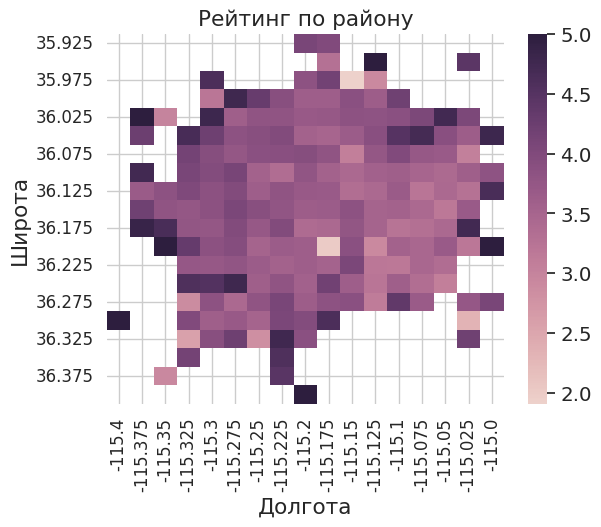

In [104]:
district_rating = pd.pivot_table(yelp_joined,
                                 index=["latitude_r"],
                                 columns=["longitude_r"],
                                 values="rating",
                                 aggfunc="mean")

fig, ax = plt.subplots()
sns.heatmap(district_rating,
            cmap=sns.cubehelix_palette(as_cmap=True))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set(xlabel='Долгота', ylabel='Широта', title="Рейтинг по району")

plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых, на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Оценка районов с малым количеством компаний не дает информации о районе в целом, а лишь отражает качество работы этих конкретных компаний. Проблема автоматического подстраивания цветовой гаммы заключается в том, что такая раскраска районов дает ложное представление о разнице в качестве компаний между районами. Так, если бы у всех компаний была оценка не ниже 4, то несмотря на то, что компании работают примерно одинаково, график бы обесценивал районы с качеством заведений ненамного ниже максимального.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

Для начала оставим только компании из тех районов, где компаний не менее 30.

In [105]:
main_district = (
    yelp_joined
        .reset_index()
        .groupby(by=["latitude_r", "longitude_r"])["business_id"]
        .count()
)

main_district = main_district[main_district > 29].index.to_numpy()

yelp_main_district = (
    yelp_joined
        .reset_index()
        .set_index(["latitude_r", "longitude_r"])
        .loc[main_district]
        .reset_index()
        .set_index("business_id")
)

Теперь построим `heatplot` для отфильтрованных районов.

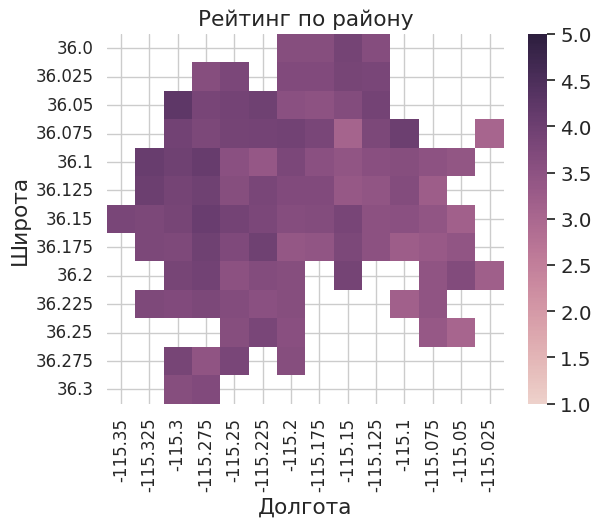

In [106]:
main_district_rating = pd.pivot_table(yelp_main_district,
                                 index=["latitude_r"],
                                 columns=["longitude_r"],
                                 values="rating",
                                 aggfunc="mean")

fig, ax = plt.subplots()
sns.heatmap(main_district_rating,
            vmin=1,
            vmax=5,
            cmap=sns.cubehelix_palette(as_cmap=True))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set(xlabel='Долгота', ylabel='Широта', title="Рейтинг по району")

plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** С отсеиванием районов с малым количеством компаний и установлением корректной цветовой гаммы ясно стало видно, что качество обслуживания по всему Лас-Вегасу не так сильно варьируется, как казалось, глядя на предыдущий график. Районы в западной части города кажутся чуть лучшими, чем в восточной части. Также не наблюдается очень плохих и очень хороших районов.

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

Подготовим данные: отберем рестораны, отфильтруем по отзывам и рассмотрим районы с не менее чем 10-ю ресторанами.

In [107]:
yelp_joined["categories"] = yelp_joined["categories"].str.lower()
yelp_restaurants = yelp_joined[yelp_joined["categories"].str.contains("restaurant")]
yelp_restaurants = yelp_restaurants[yelp_restaurants.reviews > 4]

restaurants_district = (
    yelp_restaurants
        .reset_index()
        .groupby(by=["latitude_r", "longitude_r"])["business_id"]
        .count()
)

restaurants_district = restaurants_district[restaurants_district > 9].index.to_numpy()

yelp_restaurants_district = (
    yelp_restaurants
        .reset_index()
        .set_index(["latitude_r", "longitude_r"])
        .loc[restaurants_district]
        .reset_index()
        .set_index("business_id")
)

Построим график для ресторанов.

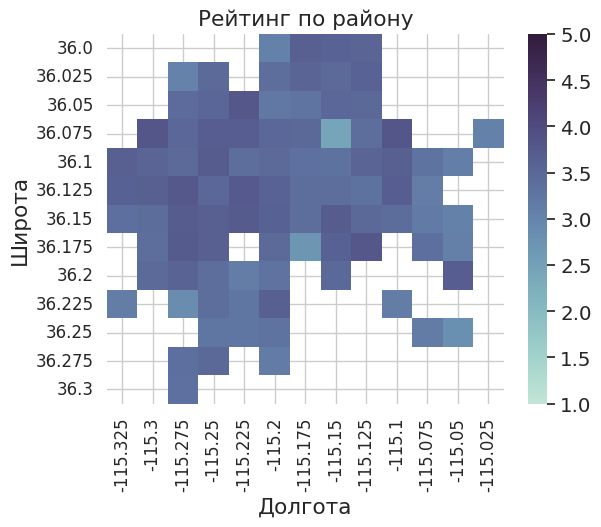

In [108]:
restaurants_district_rating = pd.pivot_table(yelp_restaurants_district,
                                             index=["latitude_r"],
                                             columns=["longitude_r"],
                                             values="rating",
                                             aggfunc="mean")

fig, ax = plt.subplots()
sns.heatmap(restaurants_district_rating,
            vmin=1,
            vmax=5,
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set(xlabel='Долгота', ylabel='Широта', title="Рейтинг по району")

plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Ограничение на количество отзывов дает нам информацию о том, что мнение о ресторане не составлено одним человеком и некоторую гарантию честности (больше людей оставили отзыв, значит больше шанс, что отзывы не подставные). Ограничение на количество ресторанов в районе нужно, чтобы у людей был выбор, куда им пойти, и их мнение не было предвзято. Также, аналогично вопросу про компании, рейтинг одного-двух хороших ресторанов не говорит о качестве еды в районе в целом (там просто некуда сходить).

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [109]:
best_restaurants = (
    yelp_restaurants[yelp_restaurants.reviews > 50]
        .sort_values(by="rating", ascending=False)
        .reset_index()[
            ["name", "rating", "reviews", "latitude", "longitude", "categories"]
        ]
)

best_restaurants.head(10)

name    rating  reviews   latitude   longitude  \
0    "Lip Smacking Foodie Tours"  4.966480      179  36.114537 -115.172678   
1                 "Pepito Shack"  4.907692       65  36.152477 -115.151945   
2               "Bosa Boba Cafe"  4.890909       55  36.125960 -115.184846   
3                 "Garden Grill"  4.868132       91  36.166783 -115.286197   
4                 "Brew Tea Bar"  4.848069     1165  36.054195 -115.242443   
5               "Poppa Naps BBQ"  4.836538      104  36.116549 -115.088115   
6               "Zenaida's Cafe"  4.833333      180  36.101741 -115.100359   
7   "El Frescos Cocina Mexicana"  4.816754      191  36.098527 -115.148446   
8  "Blaqcat Ultra Hookah Lounge"  4.809524       63  36.159742 -115.232738   
9                  "Smooth Eats"  4.807018       57  36.167894 -115.140238   

                                          categories  
0  food tours;restaurants;event planning & servic...  
1  restaurants;burgers;food stands;sandwiches;hot...  
2  vietnamese;bubble tea;sandwiches;food;coffee &...  
3  tacos;street vendors;farmers market;vegetarian...  
4  cafes;tea rooms;food;bubble tea;restaurants;de...  
5  food stands;hot dogs;caterers;restaurants;amer...  
6               restaurants;breakfast & brunch;cafes  
7  caterers;mexican;restaurants;food;event planni...  
8  adult entertainment;lounges;hookah bars;restau...  
9  juice bars & smoothies;restaurants;sandwiches;...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

Для начала приведем рейтинг к нужному виду.

In [110]:
best_restaurants = best_restaurants[best_restaurants.rating >= 4.7]
best_restaurants.rating = np.round(best_restaurants.rating, 2)
best_restaurants.rating = best_restaurants.rating.apply(str)

best_restaurants.rating.head(5)

0    4.97
1    4.91
2    4.89
3    4.87
4    4.85
Name: rating, dtype: object

Построим основной график и нанесем на него сверху дополнительный.

In [111]:
# График всех ресторанов с высоким рейтингом
fig = px.scatter_mapbox(best_restaurants,
                        lat="latitude",
                        lon="longitude",
                        hover_data="rating",
                        color_discrete_sequence=["#4C78A8"],
                        zoom=10.5,
                        height=600,
                        center=go.layout.mapbox.Center(lon=-115.15, lat=36.1))

# График с 10 лучшими ресторанами.
aux_fig = px.scatter_mapbox(best_restaurants.head(10),
                            lat="latitude",
                            lon="longitude",
                            hover_data="rating",
                            color_discrete_sequence=["#DC3912"])

aux_fig.update_traces(marker=dict(size=16))
fig.update_traces(marker=dict(size=12))

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.add_trace(aux_fig.data[0])

fig.show()

In [ ]:
plotly.offline.plot(fig, filename='best_restaurants.html', auto_open=False)

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** кот Василий представляет собой привередливого клиента. Кота Василия не интересует среднее качество районов, в которых находятся рестораны. Ему важно, чтобы рестораны, которые он посещает были качественными и общепризнанными.

В ходе решения задания, мы рассмотрели компании Лас-Вегаса, в том числе их местоположение. Из вида графиков очень хорошо заметно, как распределены фирмы внутри города: концентрация в центре Лас-Вегаса и на главных улицах намного превосходит концентрацию на окраинах и в тихих районах. Кроме того, мы определили, что качество компаний на западе города немного лучше качества таковых в восточной части.

Мы рассмотрели рестораны Лас-Вегаса и нашли самые лучшие по отзывам и популярности. Кроме того, мы построили график качества районов по их ресторанам, из которого можно сделать вывод, что лучшие районы находятся чуть в отдалении от центра города. Это утверждение подтверждает карта лучших заведений в городе, которую мы построили в конце: в центре есть несколько хороших заведений, однако основное количество находится в некотором отдалении.